In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('../data/curated/property_full.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0.1', 'name', 'cost_text',
       'coordinates', 'rooms', 'baths', 'parking', 'driving_time_to_school',
       'distance_to_school', 'closest_school_name', 'closest_school_coor',
       'driving_time_to_CBD', 'distance_to_CBD', 'driving_time_to_sc',
       'distance_to_sc', 'closest_sc_name', 'closest_sc_coor',
       'driving_time_to_station', 'distance_to_station',
       'closest_station_coor', 'SA2_name', 'SA2_code', '2001population',
       '2002population', '2003population', '2004population', '2005population',
       '2006population', '2007population', '2008population', '2009population',
       '2010population', '2011population', '2012population', '2013population',
       '2014population', '2015population', '2016population', '2017population',
       '2018population', '2019population', '2020population', '2021population',
       '2011-2021no', '2011-2021%', 'Area', 'Population density 2021',
       '2014-15 #jobs*000', '2015-16 #jobs*0

In [4]:
# remove feature wouldn't be useful towards model training
df=df.drop(columns=['Unnamed: 0','Unnamed: 0_x','Unnamed: 0.1','name','coordinates','closest_school_name','closest_school_coor',
'closest_sc_name','closest_sc_coor','closest_station_coor','2001population','2002population', '2003population', 
'2004population', '2005population', '2006population', '2007population', '2008population', '2009population',
'2010population', '2011population', '2012population', '2013population','2014population', '2015population', 
'2016population', '2017population', '2018population', '2019population', '2020population',
'2014-15 MEDIAN EMPLOYMENT INCOME PER JOB', '2015-16 MEDIAN EMPLOYMENT INCOME PER JOB',
'2016-17 MEDIAN EMPLOYMENT INCOME PER JOB', '2017-18 MEDIAN EMPLOYMENT INCOME PER JOB',
'2011_unemploy_rate', '2012_unemploy_rate', '2013_unemploy_rate', '2014_unemploy_rate',
'2015_unemploy_rate', '2016_unemploy_rate', '2017_unemploy_rate', '2018_unemploy_rate', '2019_unemploy_rate', 
'2020_unemploy_rate', '2014-15 #jobs*000', '2015-16 #jobs*000', '2016-17 #jobs*000', '2017-18 #jobs*000',])

In [5]:
df.columns

Index(['cost_text', 'rooms', 'baths', 'parking', 'driving_time_to_school',
       'distance_to_school', 'driving_time_to_CBD', 'distance_to_CBD',
       'driving_time_to_sc', 'distance_to_sc', 'driving_time_to_station',
       'distance_to_station', 'SA2_name', 'SA2_code', '2021population',
       '2011-2021no', '2011-2021%', 'Area', 'Population density 2021',
       '2018-19 #jobs*000', '2018-19 MEDIAN EMPLOYMENT INCOME PER JOB',
       '2021_unemploy_rate'],
      dtype='object')

In [6]:
cols = ['cost_text', 'rooms', 'baths', 'parking', 'driving_time_to_school',
       'distance_to_school', 'driving_time_to_CBD', 'distance_to_CBD',
       'driving_time_to_sc', 'distance_to_sc', 'driving_time_to_station',
       'distance_to_station', 'SA2_code', '2021population',
       '2011-2021no', '2011-2021%', 'Area', 'Population density 2021',
       '2018-19 #jobs*000', '2018-19 MEDIAN EMPLOYMENT INCOME PER JOB',
       '2021_unemploy_rate']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df

,cost_text,rooms,baths,parking,driving_time_to_school,distance_to_school,driving_time_to_CBD,distance_to_CBD,driving_time_to_sc,distance_to_sc,...,SA2_name,SA2_code,2021population,2011-2021no,2011-2021%,Area,Population density 2021,2018-19 #jobs*000,2018-19 MEDIAN EMPLOYMENT INCOME PER JOB,2021_unemploy_rate
0,3000.0,2.0,1.0,0.0,96.04,835.89,546.54,5088.47,57.76,371.42,...,Melbourne CBD - North,206041504.0,17439.0,11038.0,172.4,0.6,31052.4,NaN,NaN,NaN
1,2800.0,3.0,3.0,3.0,172.97,1628.15,363.29,3073.39,241.71,2043.07,...,South Melbourne,206051512.0,11860.0,1520.0,14.7,1.9,6276.1,NaN,NaN,NaN
2,2600.0,4.0,4.0,3.0,82.66,540.05,503.17,4658.67,94.27,521.19,...,Melbourne CBD - West,206041505.0,16179.0,8704.0,116.4,1.0,16096.9,NaN,NaN,NaN
3,2500.0,3.0,3.0,2.0,57.18,451.24,398.12,3743.68,76.49,660.80,...,Melbourne CBD - West,206041505.0,16179.0,8704.0,116.4,1.0,16096.9,NaN,NaN,NaN
4,2400.0,3.0,2.0,2.0,82.76,540.82,503.08,4657.90,94.36,521.96,...,Melbourne CBD - West,206041505.0,16179.0,8704.0,116.4,1.0,16096.9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14762,420.0,2.0,1.0,0.0,132.33,1041.53,7441.26,155197.00,832.96,14089.57,...,Wonthaggi - Inverloch,205031093.0,26723.0,6327.0,31.0,728.8,36.7,16.428,21912.5,6.3
14763,400.0,2.0,1.0,1.0,54.61,618.56,7373.15,154441.34,763.54,13273.38,...,Wonthaggi - Inverloch,205031093.0,26723.0,6327.0,31.0,728.8,36.7,16.428,21912.5,6.3
14764,400.0,3.0,1.0,2.0,50.78,375.82,7405.83,154777.39,800.09,13675.76,...,Wonthaggi - Inverloch,205031093.0,26723.0,6327.0,31.0,728.8,36.7,16.428,21912.5,6.3
14765,400.0,3.0,1.0,1.0,239.71,2671.90,7485.04,155043.69,873.94,13940.19,...,Wonthaggi - Inverloch,205031093.0,26723.0,6327.0,31.0,728.8,36.7,16.428,21912.5,6.3


/home/daozhuw/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cost_text'>

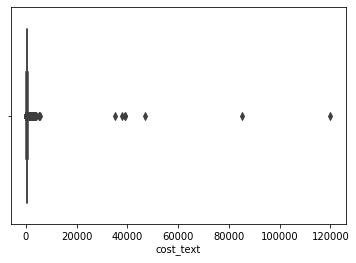

In [8]:
sns.boxplot(df['cost_text'])

In [9]:
#calculating the lower and upper limit for mean +- 1.5IQR for rent price
lower = df["cost_text"].quantile(0.25) - 1.5*(df["cost_text"].quantile(0.75)-df["cost_text"].quantile(0.25))
upper = df["cost_text"].quantile(0.75) + 1.5*(df["cost_text"].quantile(0.75)-df["cost_text"].quantile(0.25))
#remove instance which has trip time outside the 1.5IQR range from mean
df= df[(df["cost_text"]>lower) & (df["cost_text"]<upper)]
df

,cost_text,rooms,baths,parking,driving_time_to_school,distance_to_school,driving_time_to_CBD,distance_to_CBD,driving_time_to_sc,distance_to_sc,...,SA2_name,SA2_code,2021population,2011-2021no,2011-2021%,Area,Population density 2021,2018-19 #jobs*000,2018-19 MEDIAN EMPLOYMENT INCOME PER JOB,2021_unemploy_rate
42,825.0,2.0,1.0,1.0,142.04,992.91,556.13,5067.37,98.91,670.29,...,Melbourne CBD - North,206041504.0,17439.0,11038.0,172.4,0.6,31052.4,NaN,NaN,NaN
43,820.0,2.0,2.0,0.0,98.83,623.15,536.28,4866.04,70.82,498.09,...,Melbourne CBD - North,206041504.0,17439.0,11038.0,172.4,0.6,31052.4,NaN,NaN,NaN
44,815.0,2.0,1.0,1.0,109.11,857.02,356.96,3347.65,128.42,1066.58,...,Melbourne CBD - West,206041505.0,16179.0,8704.0,116.4,1.0,16096.9,NaN,NaN,NaN
45,815.0,2.0,1.0,1.0,107.84,776.57,416.16,3915.90,143.82,1205.94,...,Melbourne CBD - West,206041505.0,16179.0,8704.0,116.4,1.0,16096.9,NaN,NaN,NaN
46,800.0,2.0,2.0,0.0,98.83,623.15,536.28,4866.04,70.82,498.09,...,Melbourne CBD - North,206041504.0,17439.0,11038.0,172.4,0.6,31052.4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14762,420.0,2.0,1.0,0.0,132.33,1041.53,7441.26,155197.00,832.96,14089.57,...,Wonthaggi - Inverloch,205031093.0,26723.0,6327.0,31.0,728.8,36.7,16.428,21912.5,6.3
14763,400.0,2.0,1.0,1.0,54.61,618.56,7373.15,154441.34,763.54,13273.38,...,Wonthaggi - Inverloch,205031093.0,26723.0,6327.0,31.0,728.8,36.7,16.428,21912.5,6.3
14764,400.0,3.0,1.0,2.0,50.78,375.82,7405.83,154777.39,800.09,13675.76,...,Wonthaggi - Inverloch,205031093.0,26723.0,6327.0,31.0,728.8,36.7,16.428,21912.5,6.3
14765,400.0,3.0,1.0,1.0,239.71,2671.90,7485.04,155043.69,873.94,13940.19,...,Wonthaggi - Inverloch,205031093.0,26723.0,6327.0,31.0,728.8,36.7,16.428,21912.5,6.3


/home/daozhuw/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cost_text'>

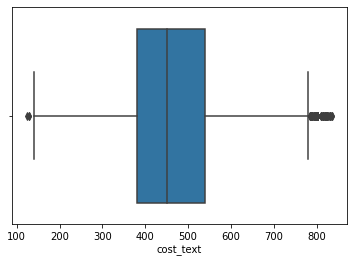

In [10]:
sns.boxplot(df['cost_text'])

In [ ]:
import seaborn as sns

In [ ]:
sample=df.sample(n=10000,random_state=114514)
sample.head()

,cost_text,rooms,baths,parking,driving_time_to_school,distance_to_school,driving_time_to_CBD,distance_to_CBD,driving_time_to_sc,distance_to_sc,...,SA2_name,SA2_code,2021population,2011-2021no,2011-2021%,Area,Population density 2021,2018-19 #jobs*000,2018-19 MEDIAN EMPLOYMENT INCOME PER JOB,2021_unemploy_rate
3730,450.0,3.0,1.0,1.0,154.21,1145.92,1732.94,19977.06,367.79,3167.96,...,Hadfield,210031440.0,6295.0,724.0,13.0,3.1,2063.8,4.267,28583.5,9.85
8842,400.0,2.0,2.0,1.0,76.72,689.44,740.44,7403.62,189.18,1998.75,...,Caulfield - North,208021177.0,22739.0,2036.0,9.8,6.4,3542.5,20.280,21232.5,4.70
11349,300.0,1.0,1.0,1.0,23.09,256.63,3348.27,71543.70,358.26,3739.10,...,Geelong West - Hamlyn Heights,203021040.0,21244.0,1997.0,10.4,32.0,663.1,17.602,28412.0,3.12
491,395.0,2.0,1.0,0.0,100.90,602.11,530.91,4787.04,72.89,477.05,...,Melbourne CBD - North,206041504.0,17439.0,11038.0,172.4,0.6,31052.4,NaN,NaN,NaN
10985,700.0,3.0,2.0,2.0,164.91,1062.07,1234.70,14003.00,486.93,4381.81,...,Bentleigh - McKinnon,208021174.0,25201.0,3250.0,14.8,6.2,4048.9,20.278,28624.5,4.67


<AxesSubplot:>

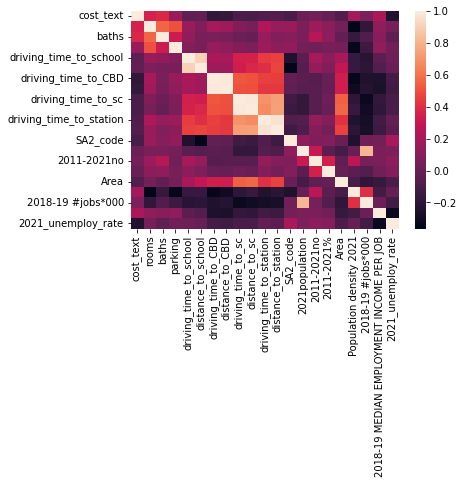

In [ ]:
sns.heatmap(sample.corr())

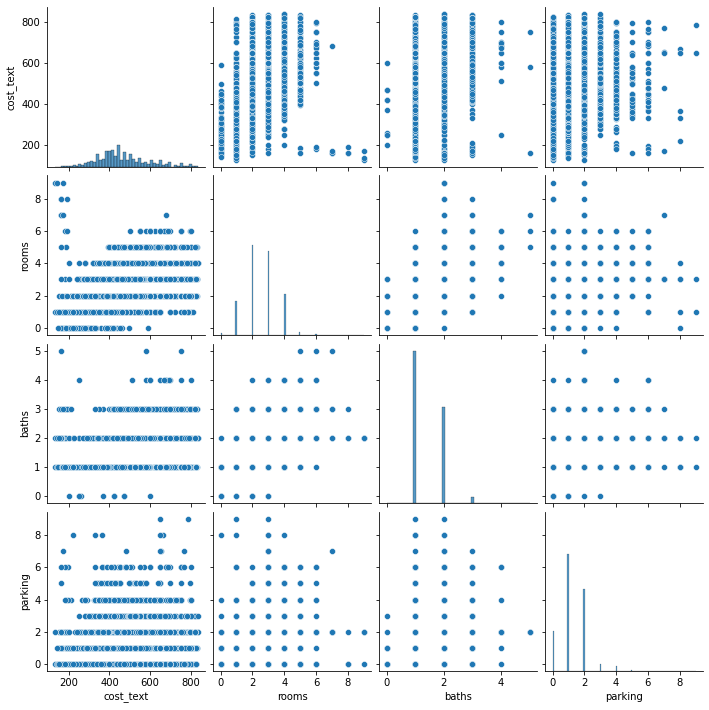

In [ ]:
sns.pairplot(sample[["cost_text",'rooms', 'baths', 'parking']])

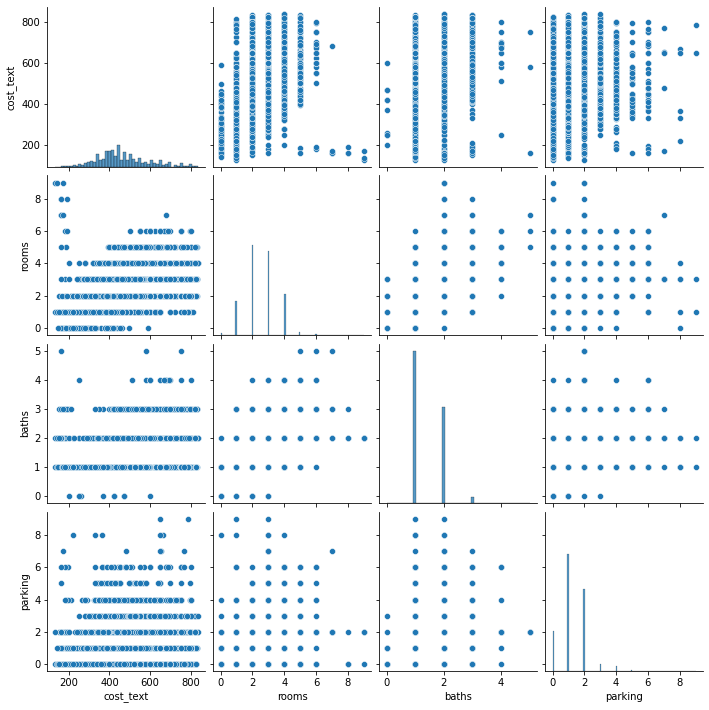

In [ ]:
sns.pairplot(sample[["cost_text",'rooms', 'baths', 'parking']])

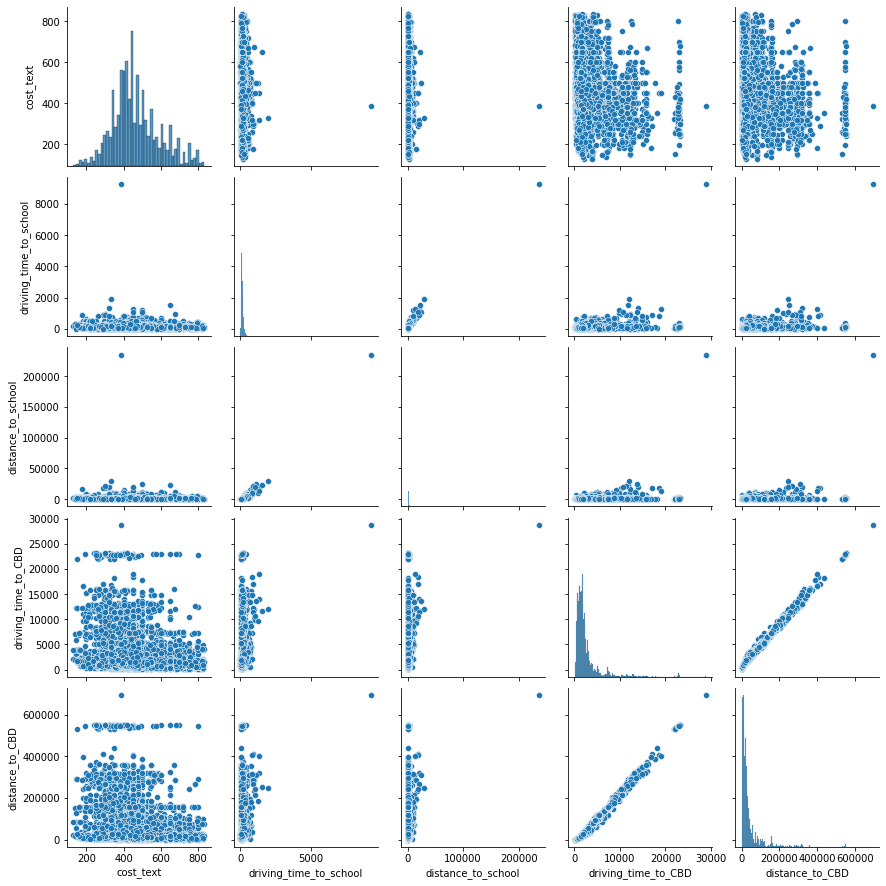

In [ ]:
sns.pairplot(sample[["cost_text",'driving_time_to_school',
       'distance_to_school', 'driving_time_to_CBD', 'distance_to_CBD']])

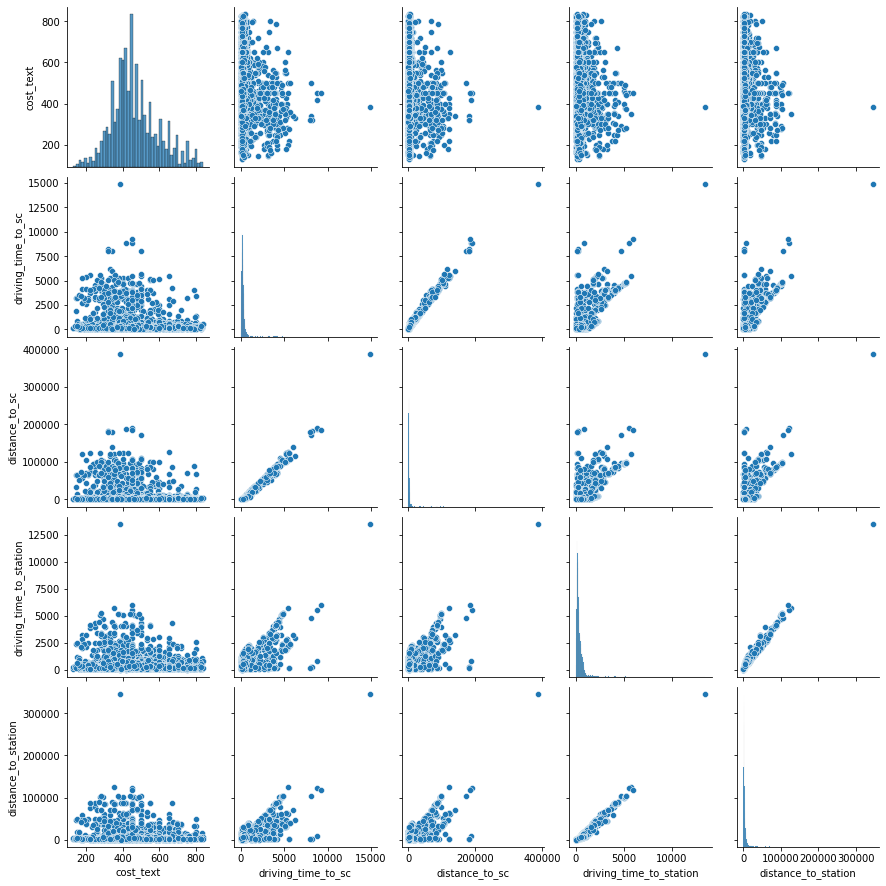

In [ ]:
sns.pairplot(sample[["cost_text",'driving_time_to_sc', 'distance_to_sc', 'driving_time_to_station',
       'distance_to_station']])

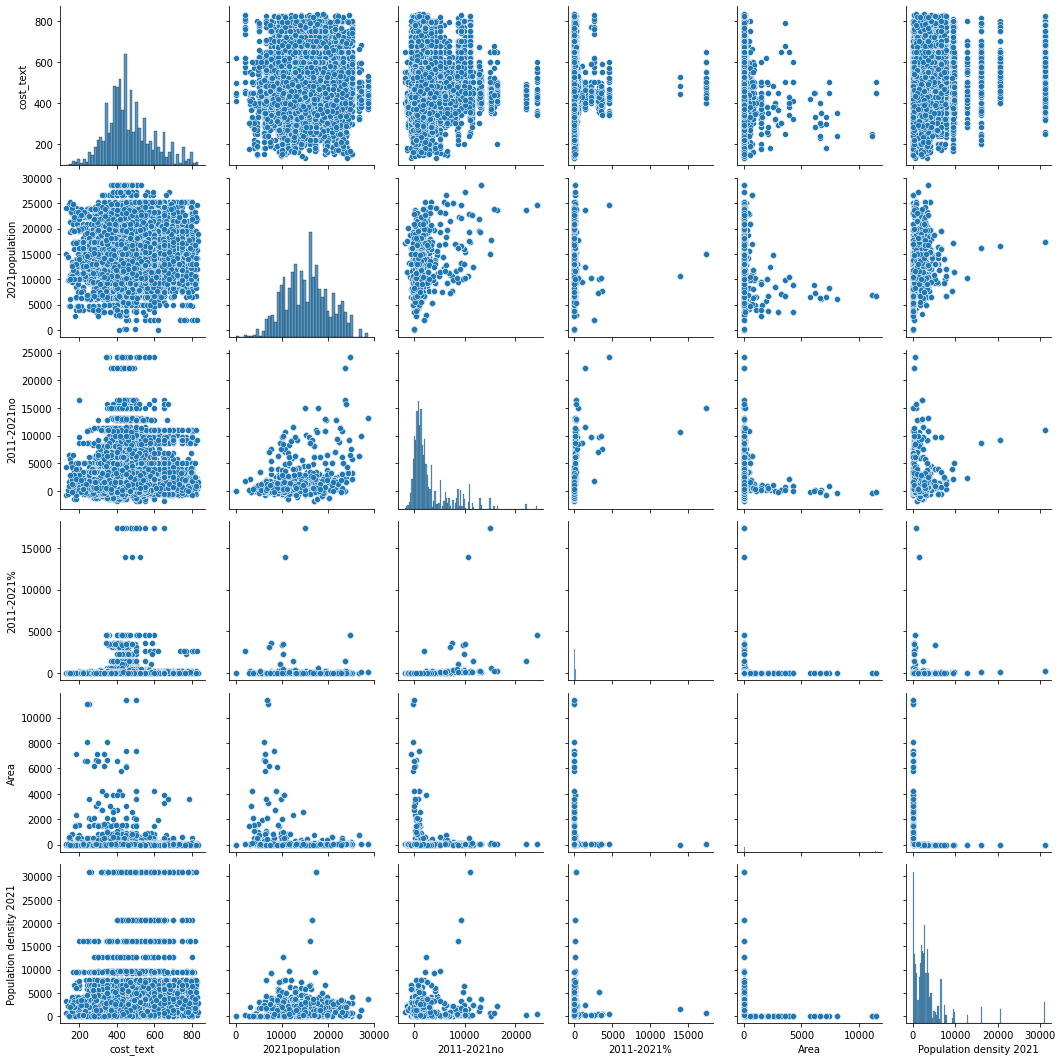

In [ ]:
sns.pairplot(sample[["cost_text",'2021population',
       '2011-2021no', '2011-2021%', 'Area', 'Population density 2021']])

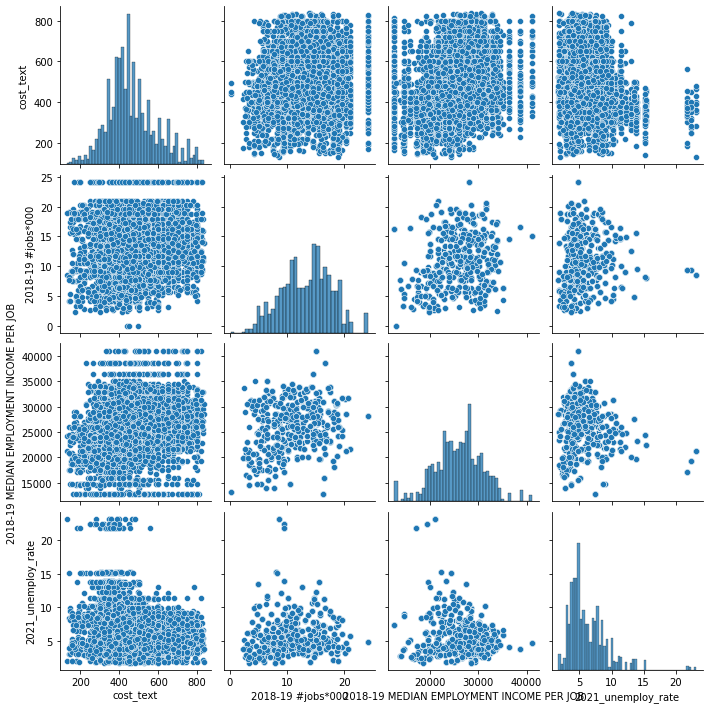

In [ ]:
sns.pairplot(sample[["cost_text",'2018-19 #jobs*000', '2018-19 MEDIAN EMPLOYMENT INCOME PER JOB',
       '2021_unemploy_rate']])